# Introduction

> **"It Was The Ship Of Dreams."**

This was one of the famous dialog from the Titanic movie, and it was so true. 

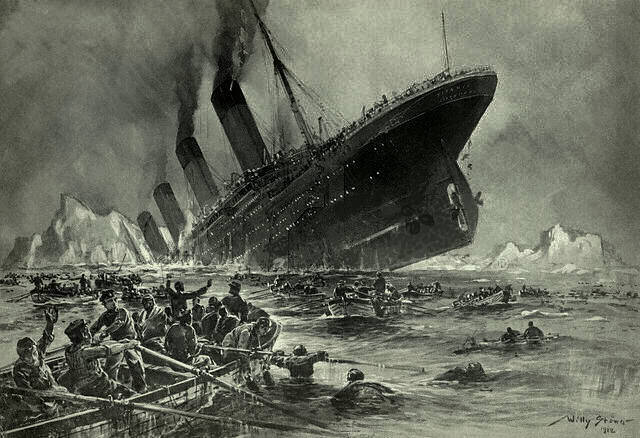

RMS Titanic was a British passenger liner, the largest ship afloat at the time she entered service. Titanic sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, which made the sinking possibly one of the deadliest for a single ship up to that time.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn import preprocessing    
le = preprocessing.LabelEncoder()

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
titanic_train_df = pd.read_csv('../input/titanic/train.csv')
titanic_test_df  = pd.read_csv('../input/titanic/test.csv')

In [ ]:
titanic_train_df.head()

In [ ]:
titanic_train_df.describe()

In [ ]:
titanic_train_df.info()

In [ ]:
n = titanic_train_df.nunique(axis=0)  
print("No.of.unique values in each column :\n", n)

In [ ]:
titanic_train_df.shape

# Exploratory Data Analysis(EDA)

In [ ]:
sns.countplot(x="Survived", data=titanic_train_df)

Data is a bit imbalanced.

In [ ]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=titanic_train_df)

In [ ]:
sns.histplot(data=titanic_train_df, x="SibSp", binwidth=1,hue="Survived", multiple="stack", kde=True)

In [ ]:
g = sns.catplot(x="Fare", y="Survived", row="Pclass", kind="box", orient="h", height=1.5, aspect=4,
                data=titanic_train_df.query("Fare > 0"))
g.set(xscale="log")

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='Survived', y='Fare', data=titanic_train_df)

In [ ]:
sns.scatterplot(data=titanic_train_df, x='Age', y='Fare',hue="Survived",
                size='Sex', sizes=(20, 60), legend="full")

In [ ]:
sns.histplot(data=titanic_train_df, x="Age", binwidth=5,hue="Survived", multiple="stack", kde=True)

# Feature Engineering

This is what we are doing for Feature engineering,
* **Title**: We see there are multiple Title, which may depict same values, so its better we do text correct. Ex. Ms and Miss both are same. Mme actual meaning is Mrs. Other values may not help us in algorithm, its better we convert these values to one value, so cardinality will reduce for this column.. I have used 'Other'.
* **Outliers**: We have 3 entries with Ticket fare more than 500, as we dont have lot of rows. I have taken mean of Fare, and assigned it to outlier, and didn't delete record.
* **Cabin**: 77% of the values for Cabin are null, we can drop column.
* **Age**: Age will help us to decide whether person have survived or not. I did create new column with Age, so we will keep this column.
* **PassengerId, Name**: These columns won't help in deciding whether a person has survived or not, so we can drop these columns.

In [ ]:
titanic_train_df.loc[titanic_train_df['Fare'] > 500, 'Fare'] = titanic_train_df['Fare'].mean()

In [ ]:
def findtitle(line):   
    splitLine = line.split(',')
    name = splitLine[1].split('.')
    title = name[0].strip()
    return title

In [ ]:
titanic_train_df['Title'] = titanic_train_df['Name'].apply(findtitle)
titanic_test_df['Title'] = titanic_test_df['Name'].apply(findtitle)

In [ ]:
titanic_train_df['Title'].unique()

In [ ]:
titanic_train_df['Title'] = titanic_train_df['Title'].replace(to_replace =["Lady", "Countess","Capt", "Col","Don", "Dr", "Major", "Rev", "Sir", "Jonkheer","Dona","the Countess"], value ="Other")
titanic_train_df['Title'] = titanic_train_df['Title'].replace('Mlle', 'Miss')
titanic_train_df['Title'] = titanic_train_df['Title'].replace('Ms', 'Miss')
titanic_train_df['Title'] = titanic_train_df['Title'].replace('Mme', 'Mrs')


In [ ]:
sns.histplot(data=titanic_train_df, x="Title", binwidth=1,hue="Survived", multiple="stack", kde=True)

In [ ]:
titanic_train_df['Title'] = le.fit_transform(titanic_train_df['Title'])

In [ ]:
titanic_test_df['Title'] = titanic_test_df['Title'].replace(to_replace =["Lady", "Countess","Capt", "Col","Don", "Dr", "Major", "Rev", "Sir", "Jonkheer","Dona","the Countess"], value ="Other")
titanic_test_df['Title'] = titanic_test_df['Title'].replace('Mlle', 'Miss')
titanic_test_df['Title'] = titanic_test_df['Title'].replace('Ms', 'Miss')
titanic_test_df['Title'] = titanic_test_df['Title'].replace('Mme', 'Mrs')

In [ ]:
titanic_test_df['Title'] = le.fit_transform(titanic_test_df['Title'])

In [ ]:
def getTicketDetail(ticket):
    split_data = ticket.split(" ")
    if len(split_data) > 1:
        return split_data[0]
    else:
        return "Other"

In [ ]:
def missing_percent_of_column(train_set):
    nan_percent = 100*(train_set.isnull().sum()/len(train_set))
    nan_percent = nan_percent[nan_percent>0].sort_values(ascending=False).round(1)
    DataFrame = pd.DataFrame(nan_percent)
    # Rename the columns
    mis_percent_table = DataFrame.rename(columns = {0 : '% of Misiing Values'}) 
    # Sort the table by percentage of missing descending
    mis_percent = mis_percent_table
    return mis_percent

In [ ]:
miss = missing_percent_of_column(titanic_train_df)
miss

In [ ]:
titanic_train_df = titanic_train_df.drop(['PassengerId','Cabin','Name'], axis=1)
titanic_test_df = titanic_test_df.drop(['Cabin','Name'], axis=1)

In [ ]:
titanic_train_df.Fare = titanic_train_df.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
titanic_test_df.Fare = titanic_test_df.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
titanic_train_df['Fare'] = titanic_train_df['Fare'].round(0).astype(int)
titanic_test_df['Fare'] = titanic_test_df['Fare'].round(0)

In [ ]:
def converting_column(df,col,convertType):
    if convertType=='OHE':
        one_hot = pd.get_dummies(df[col],prefix=col)
        df = df.drop(col,axis = 1)
        df = df.join(one_hot)
        return df
    else:
        df[col] = le.fit_transform(df[col])
        return df

In [ ]:
titanic_train_df = converting_column(titanic_train_df,'Embarked','OHE')
titanic_test_df = converting_column(titanic_test_df,'Embarked','OHE')

In [ ]:
titanic_train_df = converting_column(titanic_train_df,'Sex','OHE')
titanic_test_df = converting_column(titanic_test_df,'Sex','OHE')

In [ ]:
titanic_train_df['TotFam'] = titanic_train_df['SibSp'] + titanic_train_df['Parch'] + 1
titanic_test_df['TotFam'] = titanic_test_df['SibSp'] + titanic_test_df['Parch'] + 1

In [ ]:
titanic_train_df = titanic_train_df.drop(['SibSp','Parch'], axis=1)
titanic_test_df = titanic_test_df.drop(['SibSp','Parch'], axis=1)

In [ ]:
titanic_train_df['IsAlone'] = 0
titanic_test_df['IsAlone'] = 0

In [ ]:
titanic_train_df.loc[titanic_train_df['TotFam'] == 1, 'IsAlone'] = 1
titanic_test_df.loc[titanic_test_df['TotFam'] == 1, 'IsAlone'] = 1

In [ ]:
titanic_train_df.Age = titanic_train_df.groupby(['Title'])['Age'].apply(lambda x: x.fillna(x.mean()))
titanic_test_df.Age = titanic_test_df.groupby(['Title'])['Age'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
titanic_train_df.head(5)

# Feature Selection

In [ ]:
corr=titanic_train_df.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
g=sns.heatmap(corr, mask=mask,annot=True,cmap="YlGnBu", vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

From above chart, we can conclude on below points,
1. Sex_female & Sex_male representing the same value. So let's drop Sex_female column.
2. TotFam & IsAlone has very strong relation. We can delete TotFam column as IsAlone have better relation with Survived column.
3. Embarked_Q have very weak relation and its part of embarked column, even we if remove it, Combination of Embarked_C & Embarked_S will represent same value.
4. We can delete Ticket column as well.

In [ ]:
titanic_train_df = titanic_train_df.drop(['Sex_female','TotFam','Embarked_Q','Ticket'], axis=1)
titanic_test_df = titanic_test_df.drop(['Sex_female','TotFam','Embarked_Q','Ticket'], axis=1)

In [ ]:
titanic_train_df.head(2)

In [ ]:
titanic_train_df['Is_Kid'] = titanic_train_df['Age'].apply(lambda x: 1 if x <= 5 else 0)
titanic_test_df['Is_Kid'] = titanic_test_df['Age'].apply(lambda x: 1 if x <= 5 else 0)

In [ ]:
X_train = titanic_train_df.drop("Survived", axis=1)
Y_train = titanic_train_df["Survived"]
X_test  = titanic_test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

# Model Training & Prediction

In [ ]:
rfc_single = RandomForestClassifier(criterion='gini', n_estimators=1750,max_depth=7, min_samples_split=6, min_samples_leaf=6, max_features='auto', oob_score=True, random_state=42,n_jobs=-1, verbose=1) 

In [ ]:
rfc_single.fit(X_train, Y_train)

print("Performance on train data:", rfc_single.score(X_train, Y_train))

In [ ]:
# Get predictions
y_pred = rfc_single.predict(X_test)

In [ ]:
#Create a  DataFrame with the passengers ids and our prediction
submission = pd.DataFrame({'PassengerId':titanic_test_df['PassengerId'],'Survived':y_pred})

#Visualize the first 5 rows
submission.head()

In [ ]:
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)